In [1]:
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
con = sqlite3.connect("ddf_ocean_ocean1_v4.3.4_10yrs.db")
df = pd.read_sql("select * from observations;", con)
con.close()

In [8]:
def count_value_changes(inarr):
    return np.sum(inarr[1:].values != inarr[:-1].values)


In [9]:
fc_pn = df.groupby("night")["filter"].apply(count_value_changes)

In [10]:
fc_pn

night
0        4
1       13
10      49
11      24
12      23
        ..
3646     5
3649    10
3650     4
3651     1
3652     3
Name: filter, Length: 2772, dtype: int64

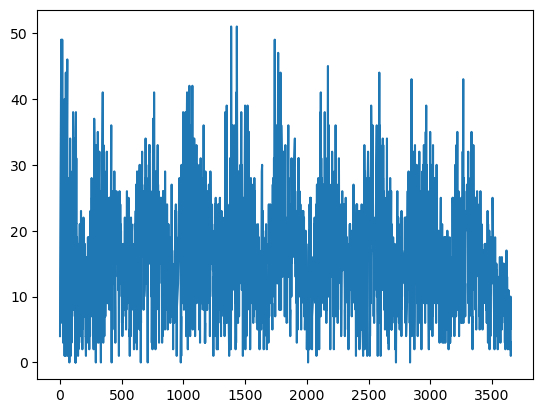

In [12]:
plt.plot(fc_pn.index, fc_pn)

In [19]:
fc_pn.index[np.where(fc_pn > 40)]

Index([  10,   18,   47,   59,  346,  762, 1029, 1048, 1072, 1386, 1428, 1432,
       1739, 1767, 1786, 2112, 2170, 2586, 2847, 3266],
      dtype='int64', name='night')

In [27]:
indx = np.where(df["night"] == 18)[0]

In [21]:
df["scheduler_note"].iloc[indx]

4651    pair_15, iz, a
4652    pair_15, iz, a
4653    pair_15, iz, a
4654    pair_15, iz, a
4655    pair_15, iz, a
             ...      
5239    pair_15, ri, b
5240    pair_15, ri, b
5241    pair_15, ri, b
5242    pair_15, ri, b
5243    pair_15, ri, b
Name: scheduler_note, Length: 593, dtype: object

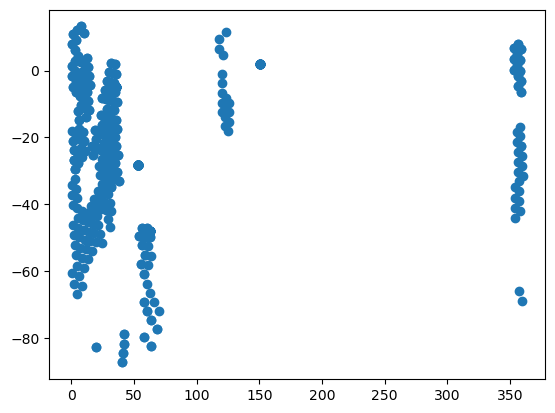

In [22]:
plt.scatter(df["fieldRA"].iloc[indx], df["fieldDec"].iloc[indx])

In [30]:
for ind in indx:
    print(df["filter"].iloc[ind], df["scheduler_note"].iloc[ind])



i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
i pair_15, iz, a
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
z pair_15, iz, b
u DD:XMM_LSS, 1330
u DD:XMM_LSS, 1331
u DD:XMM_LSS, 1332
u DD:XMM_LSS, 1333
u DD:XMM_LSS, 1334
u DD:XMM_LSS, 1335
u DD:XMM_LSS, 1336
u DD:XMM_LSS, 133

In [26]:
indx

(array([4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661,
        4662, 4663, 4664, 4665, 4666, 4667, 4668, 4669, 4670, 4671, 4672,
        4673, 4674, 4675, 4676, 4677, 4678, 4679, 4680, 4681, 4682, 4683,
        4684, 4685, 4686, 4687, 4688, 4689, 4690, 4691, 4692, 4693, 4694,
        4695, 4696, 4697, 4698, 4699, 4700, 4701, 4702, 4703, 4704, 4705,
        4706, 4707, 4708, 4709, 4710, 4711, 4712, 4713, 4714, 4715, 4716,
        4717, 4718, 4719, 4720, 4721, 4722, 4723, 4724, 4725, 4726, 4727,
        4728, 4729, 4730, 4731, 4732, 4733, 4734, 4735, 4736, 4737, 4738,
        4739, 4740, 4741, 4742, 4743, 4744, 4745, 4746, 4747, 4748, 4749,
        4750, 4751, 4752, 4753, 4754, 4755, 4756, 4757, 4758, 4759, 4760,
        4761, 4762, 4763, 4764, 4765, 4766, 4767, 4768, 4769, 4770, 4771,
        4772, 4773, 4774, 4775, 4776, 4777, 4778, 4779, 4780, 4781, 4782,
        4783, 4784, 4785, 4786, 4787, 4788, 4789, 4790, 4791, 4792, 4793,
        4794, 4795, 4796, 4797, 4798, 